In [1]:
#import modules
from sklearn import metrics, model_selection
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
pd.options.display.float_format = '{:.5f}'.format

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,target,home_team_name,away_team_name,match_date,league_name,league_id,is_cup,home_team_coach_id,away_team_coach_id,...,away_team_history_league_id_1,away_team_history_league_id_2,away_team_history_league_id_3,away_team_history_league_id_4,away_team_history_league_id_5,away_team_history_league_id_6,away_team_history_league_id_7,away_team_history_league_id_8,away_team_history_league_id_9,away_team_history_league_id_10
0,11906497,away,Newell's Old Boys,River Plate,2019-12-01 00:45:00,Superliga,636,False,468196.00000,468200.00000,...,1122.00000,642.00000,636.00000,636.00000,636.00000,1122.00000,636.00000,642.00000,636.00000,1122.00000
1,11984383,home,Real Estelí,Deportivo Las Sabanas,2019-12-01 01:00:00,Primera Division,752,False,516788.00000,22169161.00000,...,752.00000,752.00000,752.00000,752.00000,752.00000,752.00000,752.00000,752.00000,752.00000,752.00000
2,11983301,draw,UPNFM,Marathón,2019-12-01 01:00:00,Liga Nacional,734,False,2510608.00000,456313.00000,...,734.00000,734.00000,734.00000,734.00000,734.00000,734.00000,734.00000,734.00000,734.00000,734.00000
3,11983471,away,León,Morelia,2019-12-01 01:00:00,Liga MX,743,False,1552508.00000,465797.00000,...,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,743.00000,746.00000,743.00000
4,11883005,home,Cobán Imperial,Iztapa,2019-12-01 01:00:00,Liga Nacional,705,False,429958.00000,426870.00000,...,705.00000,705.00000,705.00000,705.00000,705.00000,705.00000,705.00000,705.00000,705.00000,705.00000


In [4]:
df.shape

(110938, 190)

In [5]:
df.columns

Index(['id', 'target', 'home_team_name', 'away_team_name', 'match_date',
       'league_name', 'league_id', 'is_cup', 'home_team_coach_id',
       'away_team_coach_id',
       ...
       'away_team_history_league_id_1', 'away_team_history_league_id_2',
       'away_team_history_league_id_3', 'away_team_history_league_id_4',
       'away_team_history_league_id_5', 'away_team_history_league_id_6',
       'away_team_history_league_id_7', 'away_team_history_league_id_8',
       'away_team_history_league_id_9', 'away_team_history_league_id_10'],
      dtype='object', length=190)

In [6]:
df['target']

0         away
1         home
2         draw
3         away
4         home
          ... 
110933    draw
110934    away
110935    draw
110936    away
110937    home
Name: target, Length: 110938, dtype: object

In [7]:
df['home_team_history_rating_5'].value_counts()

5.84470    38
5.00000    34
7.13360    29
5.82343    26
4.70450    23
           ..
5.30216     1
6.17971     1
7.91243     1
6.59200     1
7.37949     1
Name: home_team_history_rating_5, Length: 98109, dtype: int64

In [8]:
df['league_id'].value_counts()

1101    3725
9        858
1936     775
14       751
12       731
        ... 
1328       1
1712       1
1906       1
1988       1
1224       1
Name: league_id, Length: 862, dtype: int64

In [9]:
#keep only rating features
rating_features = [x for x in  df if 'rating' in x]
rating_features

['home_team_history_rating_1',
 'home_team_history_rating_2',
 'home_team_history_rating_3',
 'home_team_history_rating_4',
 'home_team_history_rating_5',
 'home_team_history_rating_6',
 'home_team_history_rating_7',
 'home_team_history_rating_8',
 'home_team_history_rating_9',
 'home_team_history_rating_10',
 'home_team_history_opponent_rating_1',
 'home_team_history_opponent_rating_2',
 'home_team_history_opponent_rating_3',
 'home_team_history_opponent_rating_4',
 'home_team_history_opponent_rating_5',
 'home_team_history_opponent_rating_6',
 'home_team_history_opponent_rating_7',
 'home_team_history_opponent_rating_8',
 'home_team_history_opponent_rating_9',
 'home_team_history_opponent_rating_10',
 'away_team_history_rating_1',
 'away_team_history_rating_2',
 'away_team_history_rating_3',
 'away_team_history_rating_4',
 'away_team_history_rating_5',
 'away_team_history_rating_6',
 'away_team_history_rating_7',
 'away_team_history_rating_8',
 'away_team_history_rating_9',
 'away_te

In [10]:
data= df[[
    'target', 'home_team_name', 'away_team_name', 'league_name',
    'home_team_coach_id', 'away_team_coach_id', 'home_team_history_is_play_home_1',
    'home_team_history_opponent_goal_1', 'home_team_history_rating_1','home_team_history_coach_1',
    'home_team_history_league_id_1', 'away_team_history_is_play_home_1',
    'away_team_history_goal_1', 'away_team_history_opponent_goal_1', 'away_team_history_rating_1',
    'away_team_history_opponent_rating_1', 'away_team_history_coach_1'
]].copy()

data.head()

,target,home_team_name,away_team_name,league_name,home_team_coach_id,away_team_coach_id,home_team_history_is_play_home_1,home_team_history_opponent_goal_1,home_team_history_rating_1,home_team_history_coach_1,home_team_history_league_id_1,away_team_history_is_play_home_1,away_team_history_goal_1,away_team_history_opponent_goal_1,away_team_history_rating_1,away_team_history_opponent_rating_1,away_team_history_coach_1
0,away,Newell's Old Boys,River Plate,Superliga,468196.00000,468200.00000,0.00000,1.00000,3.85686,468196.00000,636.00000,0.00000,1.00000,2.00000,4.59800,5.25323,468200.00000
1,home,Real Estelí,Deportivo Las Sabanas,Primera Division,516788.00000,22169161.00000,1.00000,2.00000,13.66880,516788.00000,752.00000,0.00000,1.00000,0.00000,6.00059,6.88176,22169161.00000
2,draw,UPNFM,Marathón,Liga Nacional,2510608.00000,456313.00000,0.00000,1.00000,5.73672,2510608.00000,734.00000,0.00000,3.00000,1.00000,8.37942,5.48734,456313.00000
3,away,León,Morelia,Liga MX,1552508.00000,465797.00000,0.00000,3.00000,5.99880,1552508.00000,743.00000,1.00000,3.00000,3.00000,5.99880,5.99880,465797.00000
4,home,Cobán Imperial,Iztapa,Liga Nacional,429958.00000,426870.00000,0.00000,2.00000,6.29574,429958.00000,705.00000,1.00000,4.00000,1.00000,6.34939,5.57518,426870.00000


In [11]:
data.shape

(110938, 17)

In [12]:
df.dtypes

id                                  int64
target                             object
home_team_name                     object
away_team_name                     object
match_date                         object
                                   ...   
away_team_history_league_id_6     float64
away_team_history_league_id_7     float64
away_team_history_league_id_8     float64
away_team_history_league_id_9     float64
away_team_history_league_id_10    float64
Length: 190, dtype: object

In [13]:
df['away_team_history_coach_1'].value_counts()

37252510.00000    5222
455361.00000        49
524307.00000        47
466541.00000        47
2511092.00000       47
                  ... 
37350082.00000       1
37453081.00000       1
154381.00000         1
37553940.00000       1
37558621.00000       1
Name: away_team_history_coach_1, Length: 8934, dtype: int64

In [14]:
df['home_team_history_is_play_home_1'].value_counts()

0.00000    76083
1.00000    33696
Name: home_team_history_is_play_home_1, dtype: int64

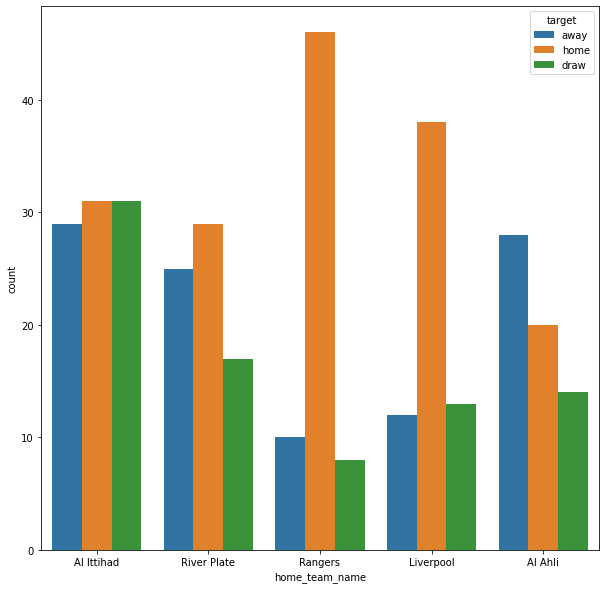

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x="home_team_name",hue="target",data=df,order=df.home_team_name.value_counts().iloc[:5].index)
plt.show()

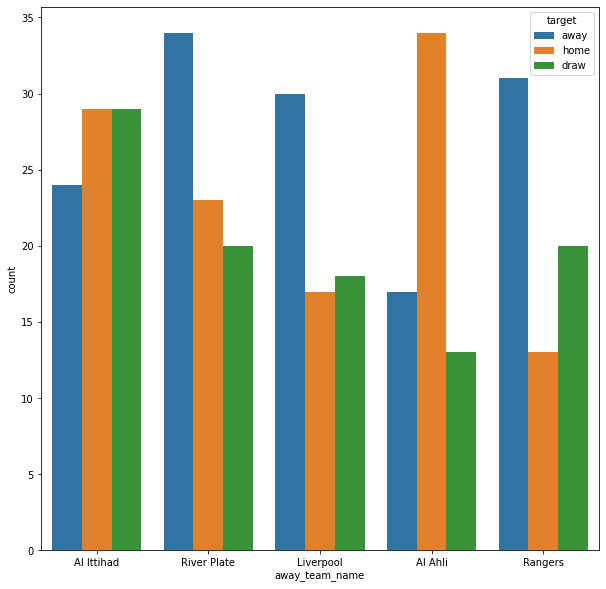

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(x="away_team_name",hue="target",data=df,order=df.away_team_name.value_counts().iloc[:5].index)
plt.show()

## Team history at home

In [17]:
#keep only play home history features
play_home_features = [x for x in  df if 'play_home' in x]
play_home_features

['home_team_history_is_play_home_1',
 'home_team_history_is_play_home_2',
 'home_team_history_is_play_home_3',
 'home_team_history_is_play_home_4',
 'home_team_history_is_play_home_5',
 'home_team_history_is_play_home_6',
 'home_team_history_is_play_home_7',
 'home_team_history_is_play_home_8',
 'home_team_history_is_play_home_9',
 'home_team_history_is_play_home_10',
 'away_team_history_is_play_home_1',
 'away_team_history_is_play_home_2',
 'away_team_history_is_play_home_3',
 'away_team_history_is_play_home_4',
 'away_team_history_is_play_home_5',
 'away_team_history_is_play_home_6',
 'away_team_history_is_play_home_7',
 'away_team_history_is_play_home_8',
 'away_team_history_is_play_home_9',
 'away_team_history_is_play_home_10']

In [18]:
df.groupby('home_team_name')[play_home_features].mean()

,home_team_history_is_play_home_1,home_team_history_is_play_home_2,home_team_history_is_play_home_3,home_team_history_is_play_home_4,home_team_history_is_play_home_5,home_team_history_is_play_home_6,home_team_history_is_play_home_7,home_team_history_is_play_home_8,home_team_history_is_play_home_9,home_team_history_is_play_home_10,away_team_history_is_play_home_1,away_team_history_is_play_home_2,away_team_history_is_play_home_3,away_team_history_is_play_home_4,away_team_history_is_play_home_5,away_team_history_is_play_home_6,away_team_history_is_play_home_7,away_team_history_is_play_home_8,away_team_history_is_play_home_9,away_team_history_is_play_home_10
home_team_name,,,,,,,,,,,,,,,,,,,,
07 Vestur,0.53846,0.38462,0.53846,0.61538,0.75000,0.54545,0.45455,0.63636,0.54545,0.50000,0.53846,0.46154,0.46154,0.46154,0.46154,0.58333,0.66667,0.41667,0.75000,0.27273
1. FC M'gladbach,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,nan,nan,1.00000,0.20000,0.40000,0.60000,0.40000,0.40000,0.60000,0.60000,0.20000,0.60000
1. FC Merseburg,0.00000,0.66667,0.50000,0.33333,0.66667,0.50000,0.50000,0.50000,0.66667,0.40000,0.66667,0.66667,0.33333,0.50000,0.66667,0.83333,0.33333,0.66667,0.50000,0.00000
1. Maj Ruma,0.20000,0.50000,0.50000,0.33333,0.33333,0.66667,0.00000,1.00000,0.00000,nan,0.40000,0.20000,0.40000,0.20000,0.33333,1.00000,0.50000,1.00000,1.00000,nan
12 de Octubre,0.32000,0.64000,0.44000,0.52000,0.64000,0.44000,0.64000,0.44000,0.64000,0.48000,0.72000,0.28000,0.60000,0.44000,0.52000,0.48000,0.44000,0.56000,0.48000,0.60000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Žilina,0.34483,0.48276,0.55172,0.48276,0.55172,0.51724,0.55172,0.44828,0.55172,0.41379,0.51724,0.58621,0.37931,0.55172,0.55172,0.58621,0.37931,0.44828,0.58621,0.34483
Žilina II,0.30000,0.65000,0.50000,0.50000,0.65000,0.50000,0.65000,0.45000,0.70000,0.40000,0.65000,0.30000,0.30000,0.60000,0.45000,0.35000,0.55000,0.50000,0.30000,0.50000
Žilina U19,0.14286,0.71429,0.28571,0.71429,0.28571,0.57143,0.42857,0.57143,0.28571,0.71429,0.71429,0.42857,0.71429,0.57143,0.14286,0.71429,0.57143,0.28571,0.57143,0.71429


### Rating of the oppenent team

In [19]:
#keep only oppenent rating features
opponent_rating_features = [x for x in  df if 'opponent_rating' in x]
opponent_rating_features

['home_team_history_opponent_rating_1',
 'home_team_history_opponent_rating_2',
 'home_team_history_opponent_rating_3',
 'home_team_history_opponent_rating_4',
 'home_team_history_opponent_rating_5',
 'home_team_history_opponent_rating_6',
 'home_team_history_opponent_rating_7',
 'home_team_history_opponent_rating_8',
 'home_team_history_opponent_rating_9',
 'home_team_history_opponent_rating_10',
 'away_team_history_opponent_rating_1',
 'away_team_history_opponent_rating_2',
 'away_team_history_opponent_rating_3',
 'away_team_history_opponent_rating_4',
 'away_team_history_opponent_rating_5',
 'away_team_history_opponent_rating_6',
 'away_team_history_opponent_rating_7',
 'away_team_history_opponent_rating_8',
 'away_team_history_opponent_rating_9',
 'away_team_history_opponent_rating_10']

In [20]:
df.groupby('home_team_name')[opponent_rating_features].mean()

,home_team_history_opponent_rating_1,home_team_history_opponent_rating_2,home_team_history_opponent_rating_3,home_team_history_opponent_rating_4,home_team_history_opponent_rating_5,home_team_history_opponent_rating_6,home_team_history_opponent_rating_7,home_team_history_opponent_rating_8,home_team_history_opponent_rating_9,home_team_history_opponent_rating_10,away_team_history_opponent_rating_1,away_team_history_opponent_rating_2,away_team_history_opponent_rating_3,away_team_history_opponent_rating_4,away_team_history_opponent_rating_5,away_team_history_opponent_rating_6,away_team_history_opponent_rating_7,away_team_history_opponent_rating_8,away_team_history_opponent_rating_9,away_team_history_opponent_rating_10
home_team_name,,,,,,,,,,,,,,,,,,,,
07 Vestur,8.61168,8.75077,7.84316,7.24285,8.22896,8.23071,7.79052,7.23697,7.06938,7.62485,9.27794,8.59408,7.40321,8.72378,8.28582,8.11448,7.46213,8.45041,9.83256,9.12497
1. FC M'gladbach,11.37313,9.09024,10.83554,8.72834,8.09978,8.81094,8.18743,10.39693,nan,nan,8.42279,11.86303,9.88114,10.09725,8.03448,10.59350,9.03045,8.50468,11.95956,10.17924
1. FC Merseburg,9.23196,7.66353,8.72652,8.39350,8.16959,7.95816,8.57144,7.92336,8.11785,8.33322,8.30824,7.76103,9.77271,10.19091,9.35485,8.89810,9.47924,9.43180,9.00566,11.09190
1. Maj Ruma,7.18673,5.48778,6.05796,5.92514,7.32032,6.61503,8.12736,6.39288,8.51738,nan,7.64737,6.85652,6.53084,5.69839,5.76154,4.74419,5.48864,4.69940,8.17525,nan
12 de Octubre,7.52886,7.21602,7.17622,7.35427,6.59778,7.13380,6.72803,7.07148,6.44188,6.57022,5.42301,5.50517,5.95901,5.75086,6.07849,5.62706,5.49594,5.92517,6.08132,5.85809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Žilina,6.19983,6.05111,6.10251,5.95142,5.88507,6.28851,5.57901,5.75727,5.59431,6.13405,6.63810,6.52727,7.47069,6.05190,6.67945,6.27414,6.42875,6.57182,6.02145,6.21433
Žilina II,8.96911,7.35407,8.83921,7.61336,8.40113,7.58850,7.90542,8.20337,7.87262,8.14450,8.29617,8.97996,9.64667,6.83793,6.96600,7.76723,7.00305,7.53712,7.31366,7.47019
Žilina U19,7.32640,7.03376,6.24329,7.07541,5.69829,7.39383,5.63875,6.76481,5.26654,6.69002,7.94246,7.60820,7.36554,7.08282,7.97544,7.43644,6.98063,9.23335,7.93470,6.08457


### In the past, when did a match help

In [21]:
#keep only home team history macth date features
home_date_features = [x for x in  df if 'home_team_history_match_date' in x]
home_date_features

['home_team_history_match_date_1',
 'home_team_history_match_date_2',
 'home_team_history_match_date_3',
 'home_team_history_match_date_4',
 'home_team_history_match_date_5',
 'home_team_history_match_date_6',
 'home_team_history_match_date_7',
 'home_team_history_match_date_8',
 'home_team_history_match_date_9',
 'home_team_history_match_date_10']

In [43]:
df['target'].value_counts()

home    48113
away    35174
draw    27651
Name: target, dtype: int64

In [44]:
home_wins = df[df['target'] == "home"]

In [46]:
home_wins.groupby('home_team_name')[home_date_features]

## Which coach had a better track record

In [23]:
away_coach_features = [x for x in  df if 'away_team_history_coach' in x]
away_coach_features

['away_team_history_coach_1',
 'away_team_history_coach_2',
 'away_team_history_coach_3',
 'away_team_history_coach_4',
 'away_team_history_coach_5',
 'away_team_history_coach_6',
 'away_team_history_coach_7',
 'away_team_history_coach_8',
 'away_team_history_coach_9',
 'away_team_history_coach_10']

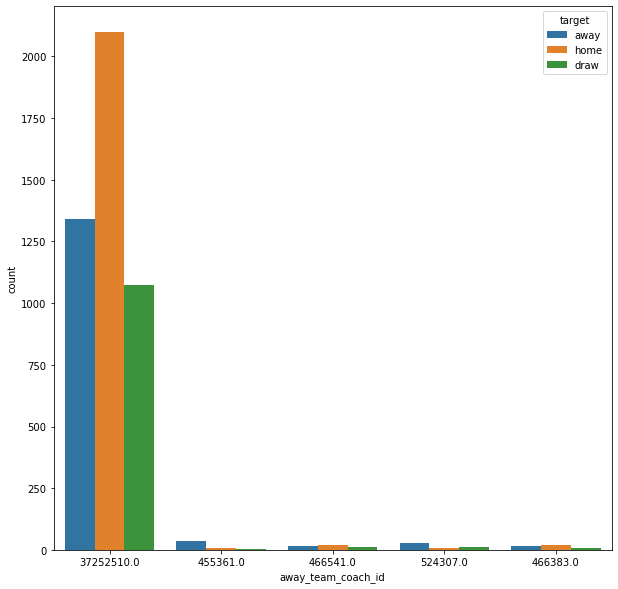

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(x="away_team_coach_id",hue="target",data=df,order=df.away_team_coach_id.value_counts().iloc[:5].index)
plt.show()

## Teams' prior league results

In [25]:
#keep only away history cup
away_is_cup_features = [x for x in  df if 'away_team_history_is_cup' in x]
away_is_cup_features

['away_team_history_is_cup_1',
 'away_team_history_is_cup_2',
 'away_team_history_is_cup_3',
 'away_team_history_is_cup_4',
 'away_team_history_is_cup_5',
 'away_team_history_is_cup_6',
 'away_team_history_is_cup_7',
 'away_team_history_is_cup_8',
 'away_team_history_is_cup_9',
 'away_team_history_is_cup_10']

In [26]:
df.groupby('away_team_name')[away_is_cup_features].mean()

,away_team_history_is_cup_1,away_team_history_is_cup_2,away_team_history_is_cup_3,away_team_history_is_cup_4,away_team_history_is_cup_5,away_team_history_is_cup_6,away_team_history_is_cup_7,away_team_history_is_cup_8,away_team_history_is_cup_9,away_team_history_is_cup_10
away_team_name,,,,,,,,,,
07 Vestur,0.00000,0.00000,0.11111,0.12500,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1. FC M'gladbach,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,nan
1. FC Merseburg,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
1. Maj Ruma,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
12 de Octubre,0.11538,0.07692,0.03846,0.11538,0.03846,0.00000,0.07692,0.03846,0.03846,0.00000
...,...,...,...,...,...,...,...,...,...,...
Žilina,0.10714,0.10714,0.21429,0.00000,0.10714,0.10714,0.00000,0.10714,0.07143,0.07143
Žilina II,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
Žilina U19,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


## Modelling

In [27]:
#Make X and y
X = df[rating_features]
y = df['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression

In [29]:
#build a simple pipeline that fill nans values with the mean and fit a logistic regression classifier without regulariation.
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ("classifier", LogisticRegression(solver='sag',C=1e5))
])

In [30]:
#evaluate the model log loss using cross validation
cv_scores = model_selection.cross_val_score(pipeline, X_train, y_train, cv=10,scoring='neg_log_loss')
print(f'The cross validation log loss is {-cv_scores.mean().round(4)}')

The cross validation log loss is 1.0208


In [31]:
#fit the model
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.4908959798089057


              precision    recall  f1-score   support

        away       0.48      0.44      0.46      7035
        draw       0.42      0.00      0.01      5530
        home       0.50      0.81      0.62      9623

    accuracy                           0.49     22188
   macro avg       0.47      0.42      0.36     22188
weighted avg       0.47      0.49      0.41     22188



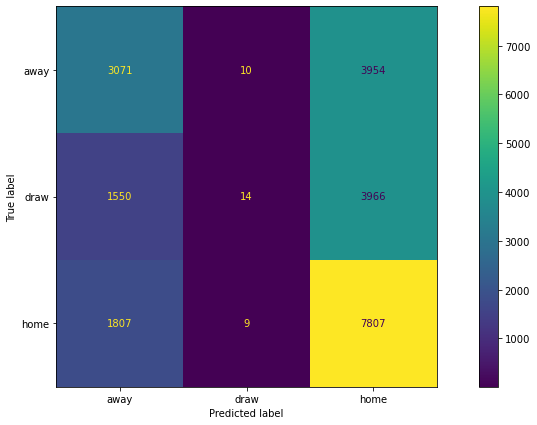

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

## Random Classifier

In [33]:
#build a simple pipeline that fill nans values with the mean and fit a logistic regression classifier without regulariation.
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ("classifier", RandomForestClassifier(max_depth = 3, random_state = 0))
])

In [34]:
#evaluate the model log loss using cross validation
cv_scores = model_selection.cross_val_score(pipeline, X_train, y_train, cv=10,scoring='neg_log_loss')
print(f'The cross validation log loss is {-cv_scores.mean().round(4)}')

The cross validation log loss is 1.0462


In [35]:
#FIT THE MODEL
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.46705426356589147


              precision    recall  f1-score   support

        away       0.57      0.17      0.26      7035
        draw       0.00      0.00      0.00      5530
        home       0.46      0.95      0.62      9623

    accuracy                           0.47     22188
   macro avg       0.34      0.37      0.29     22188
weighted avg       0.38      0.47      0.35     22188



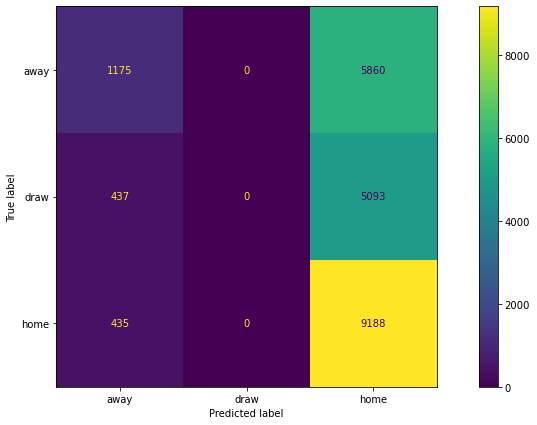

In [36]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

## kNEIGHBORS

In [37]:
#build a simple pipeline that fill nans values with the mean and fit a logistic regression classifier without regulariation.
pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ("classifier", KNeighborsClassifier(n_neighbors=3))
])

In [38]:
#evaluate the model log loss using cross validation
cv_scores = model_selection.cross_val_score(pipeline, X_train, y_train, cv=10,scoring='neg_log_loss')
print(f'The cross validation log loss is {-cv_scores.mean().round(4)}')

The cross validation log loss is 9.7917


In [39]:
#FIT THE MODEL
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.3992248062015504


              precision    recall  f1-score   support

        away       0.36      0.49      0.42      7035
        draw       0.26      0.17      0.20      5530
        home       0.49      0.46      0.48      9623

    accuracy                           0.40     22188
   macro avg       0.37      0.37      0.37     22188
weighted avg       0.39      0.40      0.39     22188



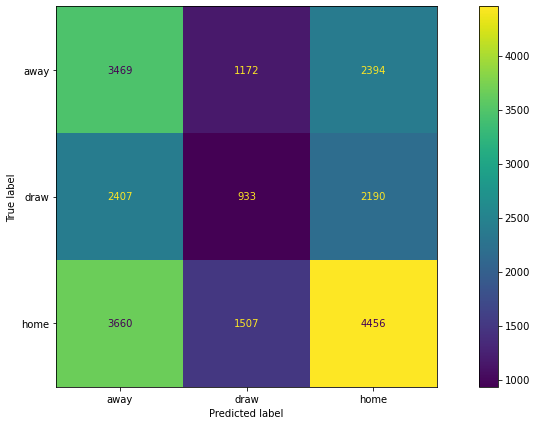

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=pipeline.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()